# 1 - Preparação dos dados

### Importando bibliotecas

In [82]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

### Importando e conhecendo os dados

In [83]:
#Importando os dados

df = pd.read_csv('/datasets/games.csv')

In [84]:
#Conhecendo os dados

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Após analisar o conjunto de dados, acredito que as seguintes alterações seriam necessárias:

- Converter o tipo da coluna 'Year_of_Release' para número inteiro, pois como a coluna representa um ano, não há necessidade de ter casas decimais.
- Converter o tipo da coluna 'Critic_Score' para número inteiro, pois observei que há apenas números inteiros nessa coluna, sem necessidade de ser um número decimal.
- Transformar os títulos das colunas para letras minúsculas, para boas práticas e para facilitar ao escrever o código.

In [85]:
#Transformando os dados (alterando tipos e nomes das colunas)

#Alterando os nomes das colunas para letras minúsculas
df.columns = df.columns.str.lower()

#Alterando os tipos das colunas
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')


#Checando as alterações 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


### Tratando valores vazios

In [86]:
#Checando valores ausentes no df

null_df = df.isna().sum()
print(null_df)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Como observado, há valores vazios nas colunas 'name', 'year_of_release', 'genre', 'critic_score', 'user_score' e 'rating'

In [87]:
#Lidando com valores ausentes na coluna 'name'

null_name = df[df['name'].isna()]
print(null_name)
df = df.dropna(subset=['name'])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08          <NA>        NaN    NaN  
14244         0.00          <NA>        NaN    NaN  


### Sobre valores vazios na coluna 'name' ⬆️

Decidi excluir as duas linhas com valores ausentes na coluna ´name´, pois percebi que faltavam outras informações importantes, como critic_score user_score rating, tornando dificil realizar uma análise utilizando essas duas linhas.

Essas duas linhas com dados ausentes podem ser explicadas por algum erro na coleta dos dados ou registros incompletos.

In [88]:
#Lidando com valores ausentes na coluna 'year_of_release'


null_year = df[df['year_of_release'].isna()]
#print(null_year)

#Tirando a média do ano de acordo com cada plataforma
mean_platform = df.groupby('platform')['year_of_release'].mean()


#Criando função para preencher valores ausentes em 'year_of_release'
def fill_year(row):
    if pd.isna(row['year_of_release']):
        return round(mean_platform[row['platform']])
    else:
        return row['year_of_release']


#Aplicando a função        
df['year_of_release'] = df.apply(fill_year, axis=1).astype('Int64')


#Checando as alterações
print(df[df['year_of_release'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


### Sobre valores vazios na coluna 'year_of_release' ⬆️

Optei por preencher os vazios em 'year_of_release' pela média do ano de acordo com cada plataforma, pois havia um grande número de valores vazios nessa coluna e por entender que esse dado é importante para a análise.

Esses dados ausentes podem ocorrer pela falta de registro, principalmente em jogos menos populares ou por algum erro na coleta dos dados.

In [89]:
#Valores vazios nas colunas 'critic_score', 'user_score' e 'rating'


null_critic_score = df[df['critic_score'].isna()]
print(null_critic_score)


null_user_score = df[df['user_score'].isna()]
print(null_user_score)

null_rating = df[df['rating'].isna()]
print(null_rating)

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

### Sobre valores vazios nas colunas 'critic_score', 'user_score' e 'rating' ⬆️

Há muitos valores ausentes nessas colunas (mais de 6.000), e como avaliações são dados subjetivos, preencher esses valores poderia distorcer a análise. Por isso, mantive os valores ausentes.

Acredito que esses dados podem estar faltando pois nem todos os jogos recebem avaliações de críticos e usuários, especialmente jogos mais antigos ou menos populares.

### Tratando valores 'TBD'

In [90]:
user_tbd = df[df['user_score'] == 'tbd']
print(user_tbd)

#Substituindo 'tbd' por NaN para padronização dos dados
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)
print(df[df['user_score'] == 'tbd'])

                                           name platform  year_of_release  \
119                               Zumba Fitness      Wii             2010   
301              Namco Museum: 50th Anniversary      PS2             2005   
520                             Zumba Fitness 2      Wii             2011   
645                                uDraw Studio      Wii             2010   
657    Frogger's Adventures: Temple of the Frog      GBA             2003   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA             2001   
16697                          Bust-A-Move 3000       GC             2003   
16698                          Mega Brain Boost       DS             2008   
16704                                  Plushees       DS             2008   
16706             Men in Black II: Alien Escape       GC             2003   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score 

### Sobre valores 'tbd' ⬆️

Os valores 'tbd' da coluna user_score foram substituídos por NaN para padronizar a representação de valores ausentes e permitir o tratamento adequado durante as análises.

### Enriquecendo os dados

In [91]:
#Criando uma nova coluna com o total das vendas em todas as regiões

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.info()
print(df[['name','total_sales']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
                                name  total_sales
0                         Wii Sports        82.54
1                  Super Mario Bros.        40.24
2                     Mario Kart Wi

# 2 - Análise de dados

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     264
1997     289
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1493
2010    1285
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64


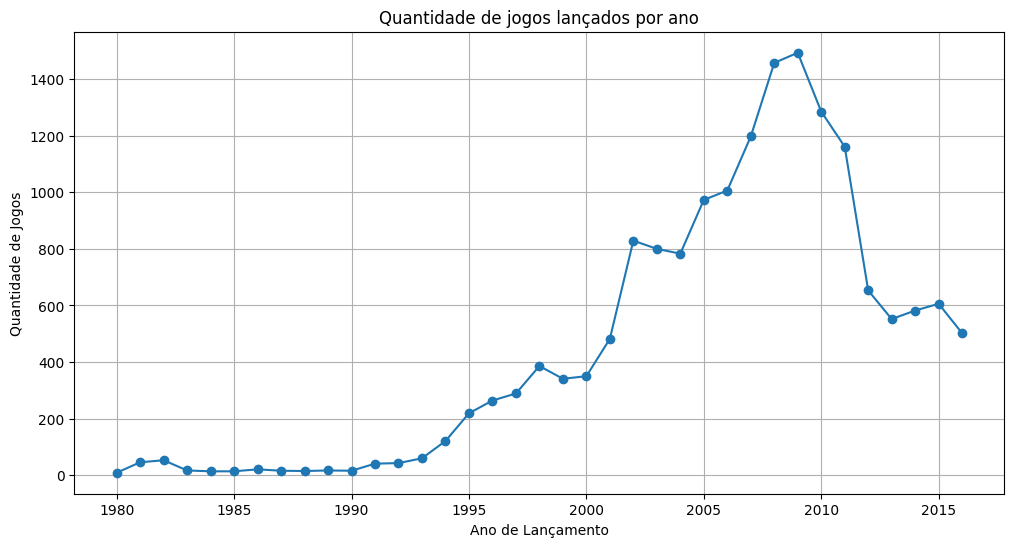

In [92]:
#Quantidade de jogos lançados em cada ano

games_year = df.groupby('year_of_release')['name'].count()
print(games_year)


plt.figure(figsize=(12,6))
plt.plot(games_year.index, games_year.values, marker='o')
plt.title('Quantidade de jogos lançados por ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.grid(True)
plt.show()

In [93]:
#Análise das vendas por plataforma

#Utilizando a coluna 'total_sales', agrupando por plataforma e somando os valores para ter o total de vendas por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#print(platform_sales)

#Selecionando as 5 plataformas com mais vendas
top_platforms = platform_sales.head()
print('Top 5 plataformas com maiores vendas totais:')
print(top_platforms)


#Análise das vendas por plataforma e por ano

#Agrupando por ano e plataforma e somando as vendas para ter o total
top_platform_names = top_platforms.index
df_top_platforms = df[df['platform'].isin(top_platform_names)]
sales_by_year_platform = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head()
print('Top 5 vendas totais por ano e plataforma:')
print(sales_by_year_platform)

Top 5 plataformas com maiores vendas totais:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64
Top 5 vendas totais por ano e plataforma:
    year_of_release platform  total_sales
28             2009      Wii       223.30
6              2004      PS2       211.81
3              2002      PS2       205.38
4              2003      PS2       184.31
8              2005      PS2       182.87


In [94]:
#Plataformas populares no passado, mas que agora as vendas cairam

#Encontrando ano de lançamento do primeiro jogo de cada plataforma
first_release = df.groupby('platform')['year_of_release'].min()
print('Ano do primeiro lançamento de cada plataforma:')
print(first_release)


#Encontrando o ano do último lançamento de cada plataforma
last_release = df.groupby('platform')['year_of_release'].max()
print('Ano do último lançamento de cada plataforma:')
print(last_release)


#Encontrando o tempo do ciclo de vida das plataformas

platform_lifecycle = pd.DataFrame({
    'first_year' : first_release,
    'last_year' : last_release
})

platform_lifecycle['active_years'] = platform_lifecycle['last_year'] - platform_lifecycle['first_year']

print('Anos ativos de cada plataforma:')
print(platform_lifecycle.sort_values(by='active_years', ascending=False))

Ano do primeiro lançamento de cada plataforma:
platform
2600    1980
3DO     1994
3DS     2011
DC      1998
DS      1985
GB      1988
GBA     2000
GC      2001
GEN     1990
GG      1992
N64     1996
NES     1983
NG      1993
PC      1985
PCFX    1996
PS      1994
PS2     2000
PS3     2006
PS4     2013
PSP     2004
PSV     2011
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
Wii     2006
WiiU    2012
X360    2005
XB      2000
XOne    2013
Name: year_of_release, dtype: Int64
Ano do último lançamento de cada plataforma:
platform
2600    1989
3DO     1995
3DS     2016
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PC      2016
PCFX    1996
PS      2003
PS2     2011
PS3     2016
PS4     2016
PSP     2015
PSV     2016
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
Wii     2016
WiiU    2016
X360    2016
XB      2008
XOne    2016
Name: year_of_release, dtype: Int64
Anos ativos 

In [95]:
#Encontrando plataformas que foram descontinuadas (sem vendas recentes)

platforms_discontinued = platform_lifecycle[platform_lifecycle['last_year'] < 2010]
print('Plataformas descontinuadas:')
print(platforms_discontinued)

Plataformas descontinuadas:
          first_year  last_year  active_years
platform                                     
2600            1980       1989             9
3DO             1994       1995             1
DC              1998       2008            10
GB              1988       2001            13
GBA             2000       2007             7
GC              2001       2007             6
GEN             1990       1994             4
GG              1992       1992             0
N64             1996       2002             6
NES             1983       1994            11
NG              1993       1996             3
PCFX            1996       1996             0
PS              1994       2003             9
SAT             1994       1999             5
SCD             1993       1994             1
SNES            1990       1999             9
TG16            1995       1995             0
WS              1999       2001             2
XB              2000       2008             8


### Sobre a análise de vendas e tempo de vida das plataformas ⬆️

Observando o gráfico de lançamentos anuais, nota-se um crescimento significativo na quantidade de jogos desde 1980, com pico entre 2005 e 2010, seguido por uma queda a partir de 2012.

As plataformas com maiores vendas totais são, respectivamente, PS2, X360, PS3, Wii e DS. Os anos com maior volume de vendas coincidem com o pico dos lançamentos, como 2009, 2004, 2002, 2003 e 2005, confirmando a correlação entre número de lançamentos e vendas.

O ciclo de vida das plataformas apresenta alta rotatividade, pois muitas foram descontinuadas logo nos primeiros anos de lançamento, enquanto outras surgem e rapidamente ganham mercado. No entanto, a duração típica no mercado para as plataformas que permanecem ativas costuma variar entre 10 e 30 anos. Essa rotatividade evidencia a necessidade de constante atualização na estratégia de vendas para acompanhar as tendências do mercado.

Vendas totais por plataforma (2000-2016):
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.10
GBA      317.85
PS4      314.14
PSP      294.05
3DS      259.00
XB       257.74
PC       209.48
GC       198.93
XOne     159.32
PS       140.70
WiiU      82.19
PSV       54.07
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: total_sales, dtype: float64
Top 5 plataformas com mais vendas:
Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


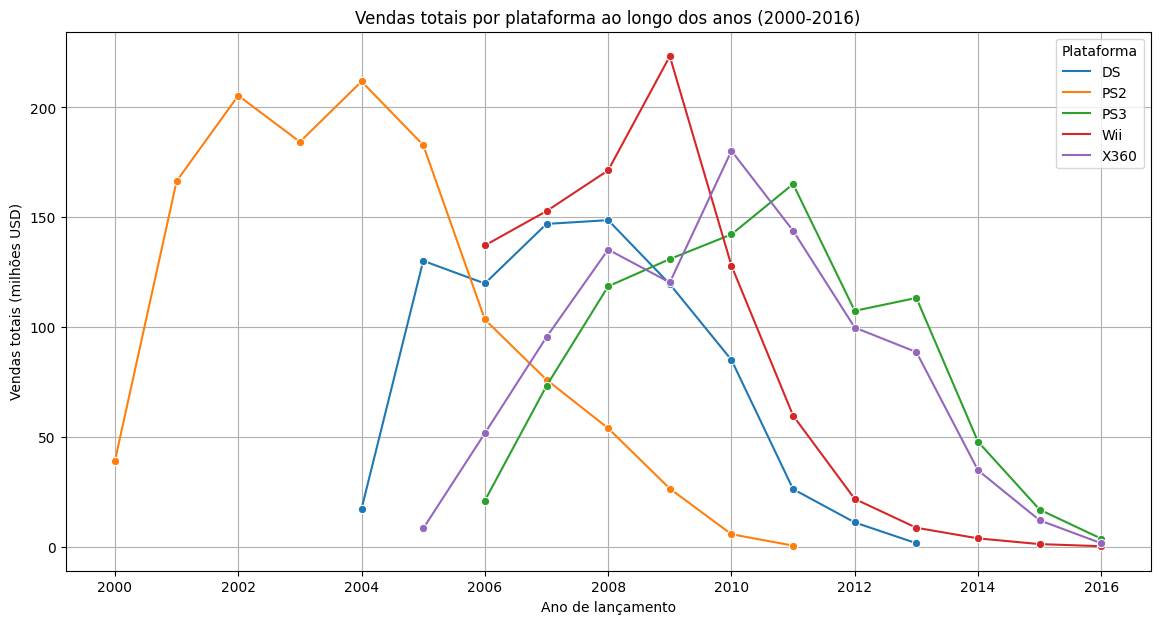

In [96]:
#Plataformas liderando em vendas entre 2000 e 2016

#Filtrando dados entre 2000-2016 e agrupando por plataforma
filter_00_16 = df[(df['year_of_release'] >= 2000) & (df['year_of_release'] <= 2016)]


#Vendas por plataforma
platform_sales = filter_00_16.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print('Vendas totais por plataforma (2000-2016):')
print(platform_sales)


#Top 5 maiores vendas por plataforma
top_platforms = platform_sales.head().index
print('Top 5 plataformas com mais vendas:')
print(top_platforms)


#Vendas por ano e plataforma
platform_year_sales = filter_00_16.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

sales_top_platforms = platform_year_sales[platform_year_sales['platform'].isin(top_platforms)]


#Criando o gráfico
plt.figure(figsize=(14,7))
sns.lineplot(data=sales_top_platforms, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Vendas totais por plataforma ao longo dos anos (2000-2016)')
plt.xlabel('Ano de lançamento')
plt.ylabel('Vendas totais (milhões USD)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

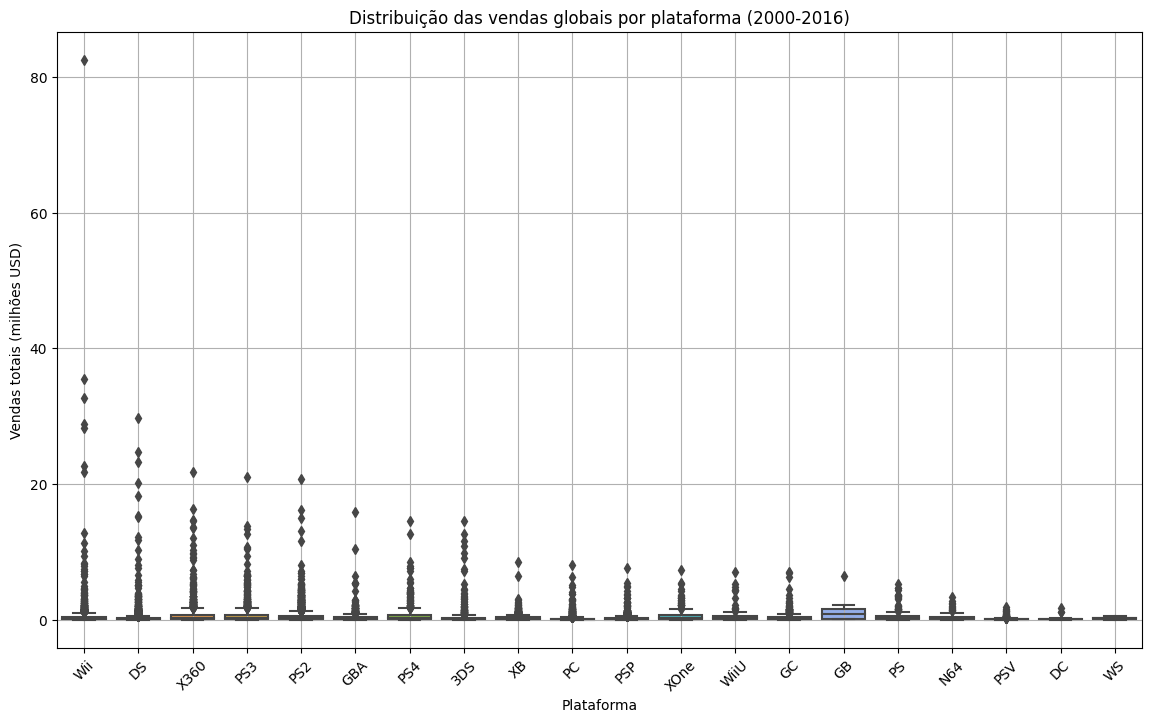

In [97]:
#Diagrama de caixa para as vendas globais de todos os jogos

plt.figure(figsize=(14,8))
sns.boxplot(data=filter_00_16, x='platform', y='total_sales')
plt.title('Distribuição das vendas globais por plataforma (2000-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas totais (milhões USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

platform
GB      1.074074
PS4     0.801378
X360    0.769746
PS3     0.705973
Wii     0.687508
XOne    0.645020
PS2     0.581106
WiiU    0.559116
N64     0.532857
PS      0.513504
3DS     0.498077
GBA     0.386679
DS      0.374930
GC      0.357788
XB      0.312791
PSP     0.243218
WS      0.240000
DC      0.239032
PC      0.224283
PSV     0.125744
Name: total_sales, dtype: float64


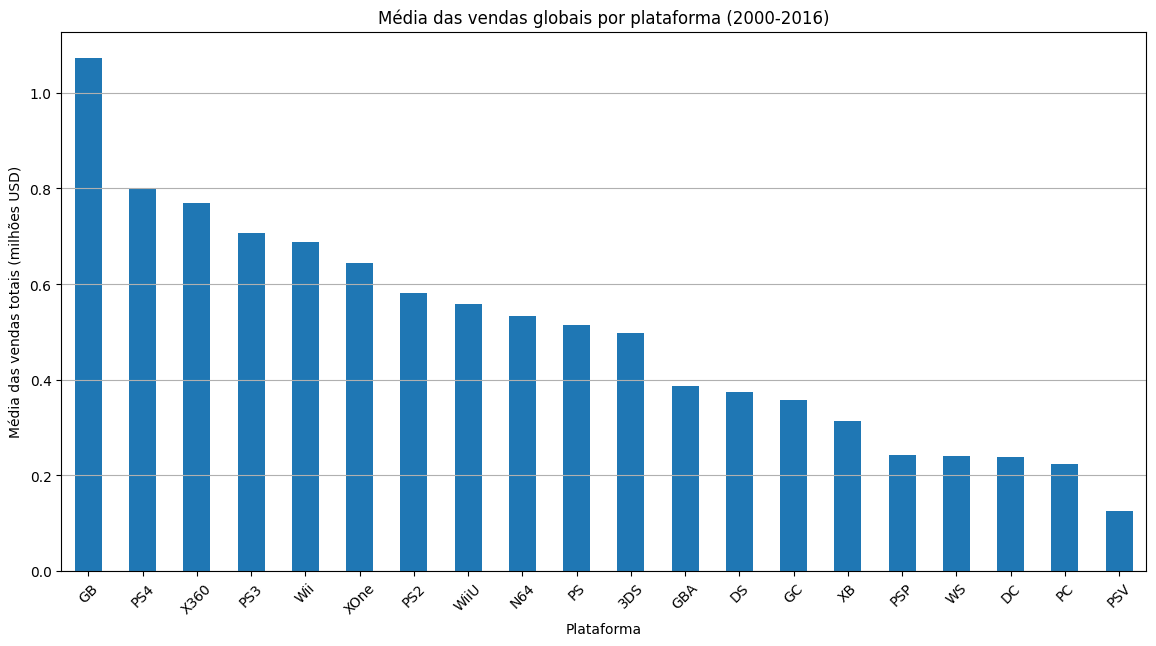

In [98]:
#Média das vendas por plataformas

mean_sales_platform = filter_00_16.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(mean_sales_platform)

#Criando o gráfico
plt.figure(figsize=(14,7))
mean_sales_platform.plot(kind='bar')
plt.title('Média das vendas globais por plataforma (2000-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Média das vendas totais (milhões USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Sobre as plataformas com vendas crescentes e decrescentes ⬆️

Entre 2000 e 2016, PS2, X360, PS3, Wii e DS lideraram em vendas totais, com destaque para o PS2. Já em vendas médias por jogo, GB e PS4 se sobressaem, mostrando que mesmo com menos lançamentos, alguns títulos foram altamente lucrativos. Isso indica que sucesso pode vir tanto de um grande catálogo quanto de poucos jogos com alto desempenho.

Correlação entre avaliações de usuários e vendas 0.12669133936341692


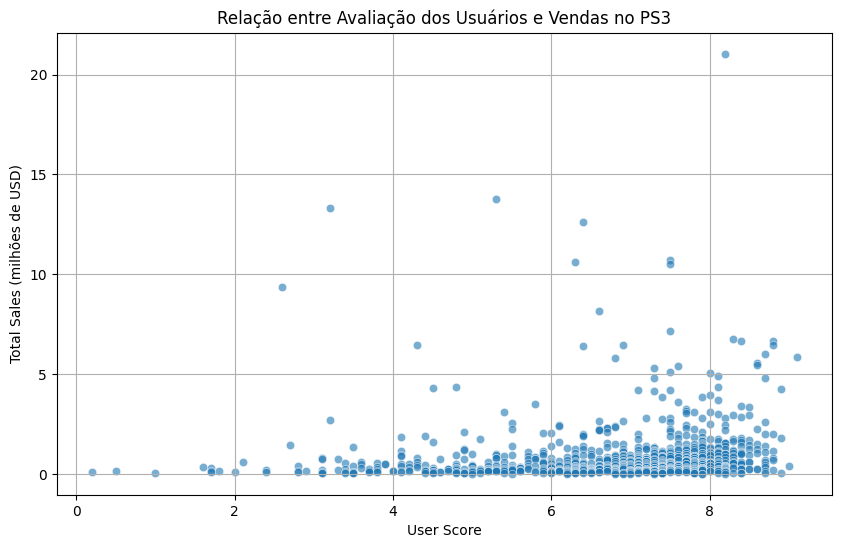

In [99]:
#Análise da relação entre avaliações de usuários e vendas do PS3

ps3_data = filter_00_16[(filter_00_16['platform'] == 'PS3')].copy()


#Correlação entre avaliações de usuários e vendas
#print(ps3_data['user_score'].head())
#print(ps3_data['total_sales'].head())
print('Correlação entre avaliações de usuários e vendas', ps3_data['user_score'].corr(ps3_data['total_sales']))


#Criando o gráfico de dispersão
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps3_data, x='user_score', y='total_sales', alpha=0.6)
plt.title('Relação entre Avaliação dos Usuários e Vendas no PS3')
plt.xlabel('User Score')
plt.ylabel('Total Sales (milhões de USD)')
plt.grid(True)
plt.show()


Correlação entre avaliação de críticos e vendas: 0.43


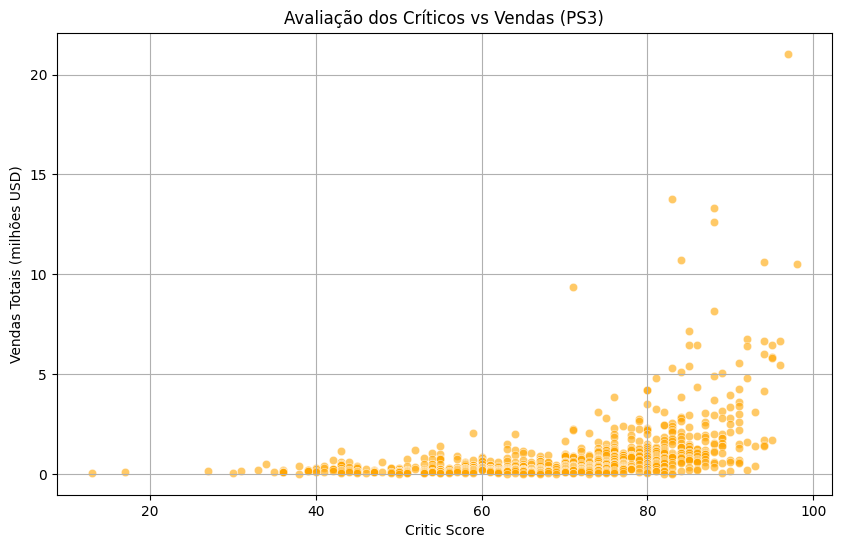

In [100]:
#Análise da relação entre avaliações de críticos e vendas do PS3

rating_sales_ps3 = df[(df['platform'] == 'PS3') & (df['year_of_release'] >= 2000) & (df['year_of_release'] <= 2016)].copy()

#Convertendo colunas para numérico e removendo NaNs
rating_sales_ps3['critic_score'] = pd.to_numeric(rating_sales_ps3['critic_score'], errors='coerce').astype(float)
rating_sales_ps3['total_sales'] = pd.to_numeric(rating_sales_ps3['total_sales'], errors='coerce').astype(float)
rating_sales_ps3 = rating_sales_ps3.dropna(subset=['critic_score', 'total_sales'])

#Calculando correlação entre avaliações dos críticos e vendas
corr_critic = rating_sales_ps3['critic_score'].corr(rating_sales_ps3['total_sales'])
print(f"Correlação entre avaliação de críticos e vendas: {corr_critic:.2f}")

#Criando gráfico de dispersão
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=rating_sales_ps3, x='critic_score', y='total_sales', alpha=0.6, color='orange')
ax.grid(True)
plt.title('Avaliação dos Críticos vs Vendas (PS3)')
plt.xlabel('Critic Score')
plt.ylabel('Vendas Totais (milhões USD)')
plt.show()

### Sobre a correlação entre avaliações e vendas de jogos do PS3 ⬆️

A correlação entre a avaliação dos críticos e as vendas dos jogos para PS3 é moderadamente positiva (0,43), indicando que notas melhores dadas pelos críticos estão associadas a maiores vendas. Já a correlação entre a avaliação dos usuários e as vendas é fraca (0,13), sugerindo que a opinião dos usuários tem menor impacto nas vendas em comparação com a dos críticos.

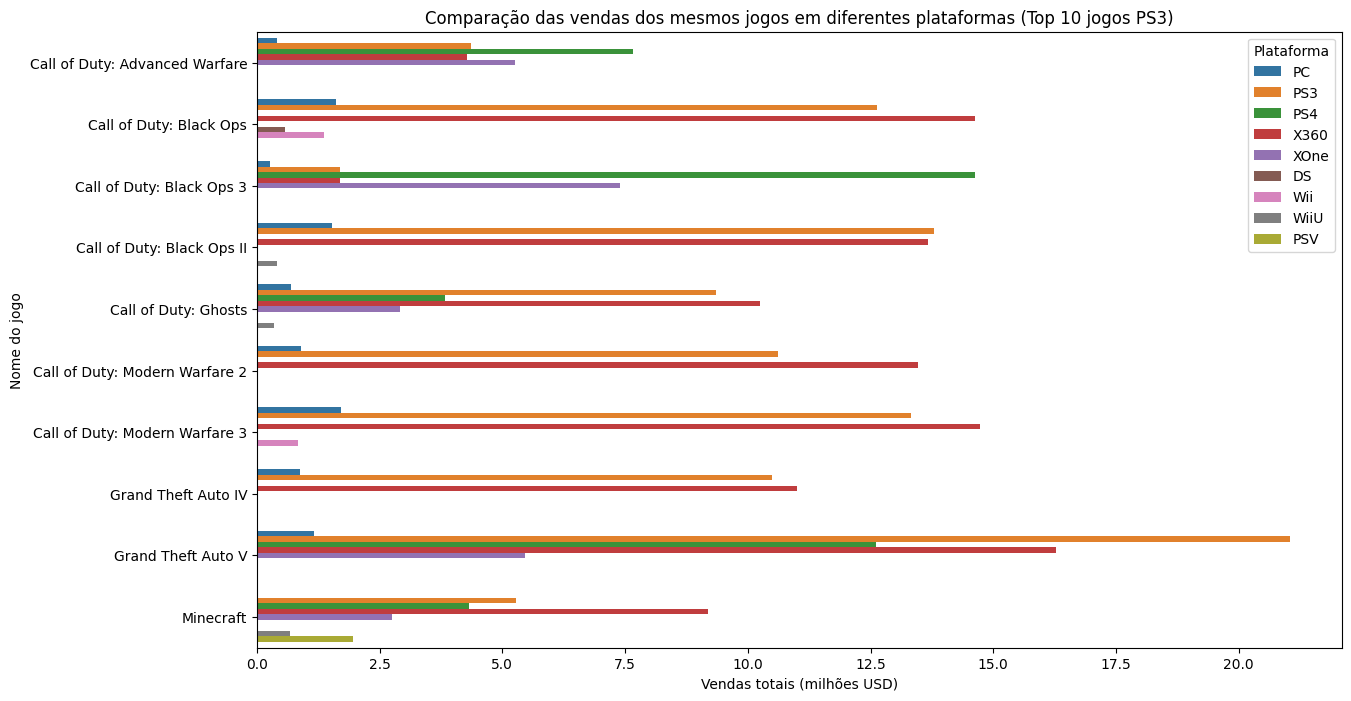

In [101]:
#Comparação de vendas dos jogos do PS3 em outras plataformas


#Filtrando por jogos do PS3
ps3_games = filter_00_16[filter_00_16['platform'] == 'PS3']['name'].unique()

#Filtrando a venda desses jogos em todas as plataformas
sales_same_games = filter_00_16[filter_00_16['name'].isin(ps3_games)].copy()

#Agrupando por jogo e plataforma e somando as vendas
sales_comparison = sales_same_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

#Visualizando as vendas dos mesmos 10 jogos mais vendidos no PS3 em diferentes plataformas
top10_games = sales_comparison.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10).index
top10_sales = sales_comparison[sales_comparison['name'].isin(top10_games)]


#Criando o gráfico
plt.figure(figsize=(14,8))
sns.barplot(data=top10_sales, x='total_sales', y='name', hue='platform')
plt.title('Comparação das vendas dos mesmos jogos em diferentes plataformas (Top 10 jogos PS3)')
plt.xlabel('Vendas totais (milhões USD)')
plt.ylabel('Nome do jogo')
plt.legend(title='Plataforma')
plt.show()

Quantidade de jogos por gênero:
Action          3131
Sports          2017
Misc            1626
Role-Playing    1316
Adventure       1201
Shooter         1154
Racing          1055
Simulation       784
Platform         729
Fighting         651
Strategy         560
Puzzle           487
Name: genre, dtype: int64


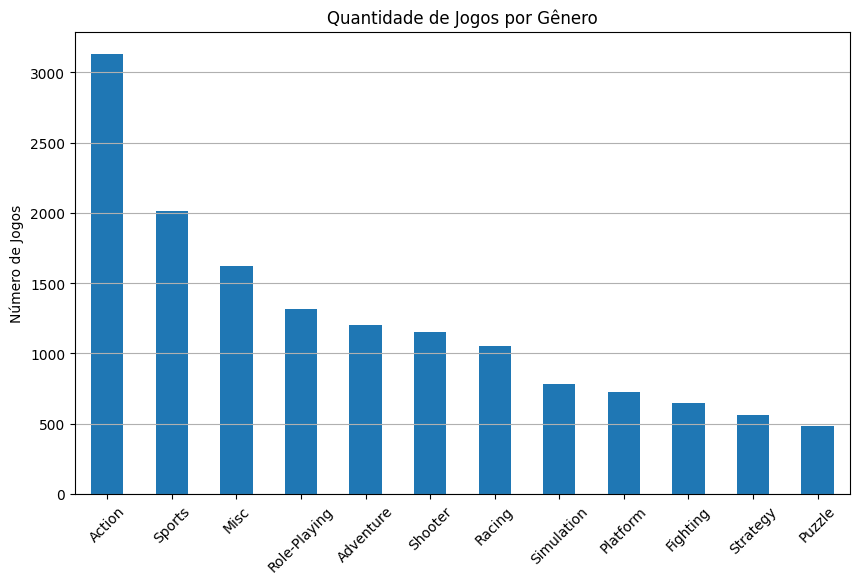


Vendas totais por gênero:
genre
Action          1549.41
Sports          1150.19
Shooter          920.28
Role-Playing     734.37
Misc             730.57
Racing           565.35
Platform         495.61
Simulation       337.42
Fighting         316.30
Adventure        186.50
Puzzle           139.86
Strategy         116.73
Name: total_sales, dtype: float64


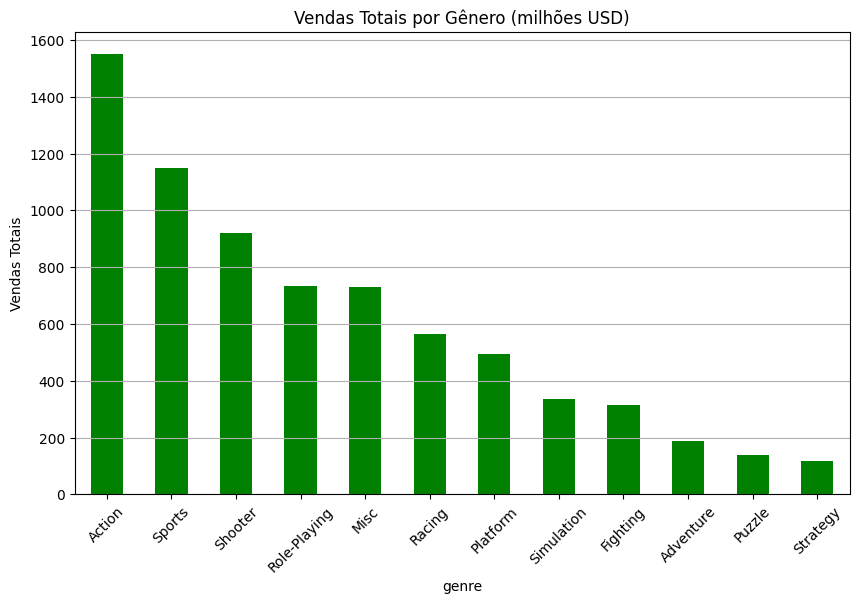


Vendas médias por gênero:
genre
Shooter         0.797470
Platform        0.679849
Sports          0.570248
Role-Playing    0.558032
Racing          0.535877
Action          0.494861
Fighting        0.485868
Misc            0.449305
Simulation      0.430383
Puzzle          0.287187
Strategy        0.208446
Adventure       0.155287
Name: total_sales, dtype: float64


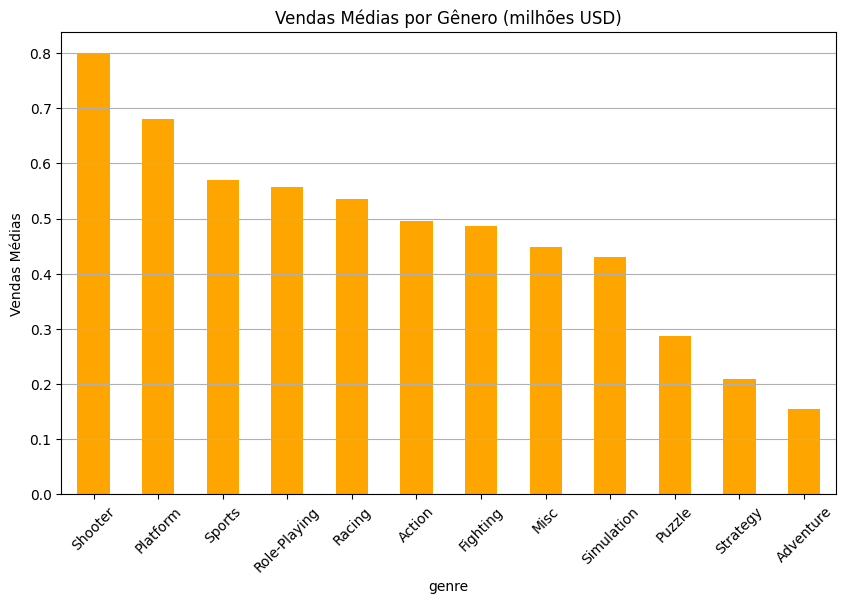

In [102]:
#Análise de gêneros de jogos

#Quantidade de jogos por gênero
games_per_genre = filter_00_16['genre'].value_counts()
print("Quantidade de jogos por gênero:")
print(games_per_genre)

#Gráfico da quantidade de jogos por gênero
plt.figure(figsize=(10,6))
games_per_genre.plot(kind='bar')
plt.title('Quantidade de Jogos por Gênero')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




#Vendas totais por gênero
sales_per_genre = filter_00_16.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("\nVendas totais por gênero:")
print(sales_per_genre)

#Gráfico das vendas totais por gênero
plt.figure(figsize=(10,6))
sales_per_genre.plot(kind='bar', color='green')
plt.title('Vendas Totais por Gênero (milhões USD)')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




#Média de vendas por gênero
avg_sales_per_genre = filter_00_16.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print("\nVendas médias por gênero:")
print(avg_sales_per_genre)

#Gráfico da média de vendas por gênero
plt.figure(figsize=(10,6))
avg_sales_per_genre.plot(kind='bar', color='orange')
plt.title('Vendas Médias por Gênero (milhões USD)')
plt.ylabel('Vendas Médias')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Sobre a análise de jogos por gênero ⬆️

Os gêneros mais comuns são Action, Sports e Misc, com Action liderando em quantidade. Em termos de vendas totais, Action e Sports também dominam, refletindo sua popularidade e impacto no mercado. Porém, ao analisar as vendas médias por jogo, gêneros como Shooter e Platform se destacam, indicando que, embora menos numerosos, esses gêneros tendem a gerar vendas mais altas por título. Já gêneros como Adventure e Strategy possuem vendas médias menores, sugerindo que, apesar de terem títulos importantes, podem não ser tão lucrativos em geral. Portanto, é possível generalizar que gêneros com muitos lançamentos nem sempre têm a maior média de vendas, enquanto alguns gêneros com menos jogos entregam maior retorno por título.

# 3 - Análise do perfil de usuários

In [103]:
#As cinco plataformas principais de cada região

na_platform_sales = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_platform_sales = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_platform_sales = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

print('Top 5 plataformas NA:')
print(na_platform_sales.head())

print('Top 5 plataformas UE:')
print(eu_platform_sales.head())

print('Top 5 plataformas JP:')
print(jp_platform_sales.head())

Top 5 plataformas NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Top 5 plataformas UE:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Top 5 plataformas JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [104]:
#Quota de mercado de cada região 

#América do Norte
total_na = na_platform_sales.sum()
na_market_share = (na_platform_sales / total_na) * 100
print('Quota de mercado NA:')
print(na_market_share.head())

#Europa
total_eu = eu_platform_sales.sum()
eu_market_share = (eu_platform_sales / total_eu) * 100
print('Quota de mercado EU:')
print(eu_market_share.head())


#Japão
total_jp = jp_platform_sales.sum()
jp_market_share = (jp_platform_sales / total_jp) * 100
print('Quota de mercado JP:')
print(jp_market_share.head())


Quota de mercado NA:
platform
X360    13.690726
PS2     13.267372
Wii     11.291719
PS3      8.941796
DS       8.689783
Name: na_sales, dtype: float64
Quota de mercado EU:
platform
PS2     13.996304
PS3     13.625038
X360    11.169322
Wii     10.816620
PS       8.811785
Name: eu_sales, dtype: float64
Quota de mercado JP:
platform
DS      13.533075
PS      10.777437
PS2     10.729647
SNES     8.983767
3DS      7.759724
Name: jp_sales, dtype: float64


In [105]:
#Os cinco principais gêneros por região

na_genre_sales = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
eu_genre_sales = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
jp_genre_sales = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

print('Top 5 gêneros NA:')
print(na_genre_sales)

print('Top 5 gêneros UE:')
print(eu_genre_sales)

print('Top 5 gêneros JP:')
print(jp_genre_sales)

Top 5 gêneros NA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Top 5 gêneros UE:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Top 5 gêneros JP:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [106]:
#Análise da relação entre vendas e classificação ESRB para cada região

esrb_na_sales = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu_sales = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp_sales = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print('Vendas por ESRB na NA:')
print(esrb_na_sales)

print('Vendas por ESRB na UE:')
print(esrb_eu_sales)

print('Vendas por ESRB no JP:')
print(esrb_jp_sales)

Vendas por ESRB na NA:
rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64
Vendas por ESRB na UE:
rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64
Vendas por ESRB no JP:
rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


### Sobre a análise do perfil de cada região ⬆️

As plataformas mais populares variam por região: X360, PS2 e Wii dominam na América do Norte; PS2, PS3 e X360 na Europa; e DS, PS e SNES no Japão. Essa diferença reflete preferências culturais distintas.

Os gêneros mais vendidos também mudam: ação, esportes e tiro lideram na América do Norte e Europa, enquanto no Japão o RPG é o gênero mais popular.

Em todas as regiões, a maioria das vendas é de jogos com classificação "E" (para todos), mas a América do Norte tem uma participação maior de jogos "Mature" em comparação ao Japão.

Esses resultados mostram que as escolhas de plataforma, gênero e classificação são influenciadas pelo público local, o que é importante para estratégias de mercado.

# 4 - Testes de Hipóteses

In [107]:

#As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

#Hipótese nula:  A média das avaliações dos usuários no Xbox One é igual à média das avaliações dos usuários no PC
#Hipótese alternativa: As médias das avaliações dos usuários no Xbox One e no PC são diferentes.

#Nível de significância: 0,05

xone = df[df['platform'] == 'XOne']['user_score'].dropna()
pc = df[df['platform'] == 'PC']['user_score'].dropna()

#Calculando a variância
var_xone = xone.var()
var_pc = pc.var()
print(f"Variância XOne: {var_xone:.2f}")
print(f"Variância PC: {var_pc:.2f}")

#Definindo se as variâncias são iguais ou não
if abs(var_xone - var_pc) / max(var_xone, var_pc) < 0.2:  
    equal_var = True
else:
    equal_var = False
print(f"Usar equal_var={equal_var}")

#Teste t
alpha = 0.05
t_stat, p_value = stats.ttest_ind(xone, pc, equal_var=equal_var)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: as médias são diferentes.")
else:
    print("Não rejeitamos Hipótese Nula: não há evidência de diferença nas médias.")


Variância XOne: 1.91
Variância PC: 2.34
Usar equal_var=True
T-statistic: -4.3683, p-value: 0.0000
Rejeitamos a Hipótese Nula: as médias são diferentes.


### Sobre o teste estatístico das plataformas Xbox One e PC ⬆️

A variância das avaliações dos usuários no Xbox One (1.91) e no PC (2.34) são relativamente próximas, então consideramos as variâncias iguais no teste. O valor do teste t (-4.37) e o p-valor muito baixo (próximo de zero) indicam que há uma diferença estatisticamente significativa entre as médias das avaliações dos usuários dessas duas plataformas. Por isso, rejeitamos a hipótese nula de que as médias são iguais, concluindo que as avaliações médias dos usuários no Xbox One e no PC são diferentes.

In [108]:
#As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

#Hipótese nula: A média das avaliações dos usuários para jogos de ação é igual à média para jogos de esportes.
#Hipótese alternativa: As médias das avaliações dos usuários para jogos de ação e esportes são diferentes.

#Nível de significância: 0,05

action = df[df['genre'] == 'Action']['user_score'].dropna()
sports = df[df['genre'] == 'Sports']['user_score'].dropna()

#Calculando a variância
var_action = action.var()
var_sports = sports.var()
print(f"Variância Action: {var_action:.2f}")
print(f"Variância Sports: {var_sports:.2f}")

#Definindo se as variâncias são iguais ou não
if abs(var_action - var_sports) / max(var_action, var_sports) < 0.2:
    equal_var = True
else:
    equal_var = False
print(f"Usar equal_var={equal_var}")

#Teste t
alpha = 0.05
t_stat, p_value = stats.ttest_ind(action, sports, equal_var=equal_var)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: as médias são diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: não há evidência de diferença nas médias.")

Variância Action: 2.03
Variância Sports: 2.60
Usar equal_var=False
T-statistic: 1.5775, p-value: 0.1148
Não rejeitamos a Hipótese Nula: não há evidência de diferença nas médias.


### Sobre o teste estatístico da classificação média de usuários do gênero Action e Sports ⬆️

As variâncias das avaliações dos gêneros Action (2.03) e Sports (2.60) são diferentes o suficiente para considerarmos variâncias desiguais no teste (equal_var=False). O valor do teste t (1.58) e o p-valor (0.11) são maiores que o nível de significância (0,05), o que indica que não há evidência estatística suficiente para afirmar que as médias das avaliações dos usuários para os gêneros Action e Sports sejam diferentes. Portanto, não rejeitamos a hipótese nula de que as médias são iguais.

# 5 - Conclusão

Neste projeto, analisamos dados de vendas, avaliações e características dos jogos para entender o comportamento do mercado de videogames entre 2000 e 2016. Observamos que as plataformas com maior sucesso comercial foram PS2, Xbox 360 e PS3, que também lideram as vendas totais e mantiveram ciclos de vida entre 10 e 30 anos, indicando alta rotatividade no mercado.

A análise das avaliações revelou que as notas dos críticos têm uma correlação moderada e positiva com as vendas, enquanto as avaliações dos usuários apresentam correlação mais fraca, sugerindo que as críticas profissionais influenciam mais as decisões de compra.

Ao comparar as vendas dos mesmos jogos em diferentes plataformas, notamos variações significativas, mostrando que o desempenho de um título depende fortemente da plataforma.

No estudo por regiões, identificamos que as preferências por plataformas e gêneros variam consideravelmente: na América do Norte e Europa, as plataformas Xbox e PlayStation dominam, enquanto no Japão há maior preferência por consoles Nintendo. Gêneros como Action e Sports são líderes em vendas nas Américas e Europa, ao passo que Role-Playing se destaca no Japão.

Por fim, testes estatísticos indicaram que as médias das avaliações dos usuários diferem significativamente entre Xbox One e PC, mas não entre os gêneros Action e Sports, mostrando nuances importantes no comportamento dos jogadores.

Esses insights ajudam a compreender como fatores como plataforma, região, gênero e avaliações impactam o mercado de jogos, fornecendo uma base sólida para estratégias de marketing, desenvolvimento e lançamento de jogos.